## Analisi Dati

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# declare dictionary to convert addresses to names
addr_to_name = {}

addr_to_name['0x3194cBDC3dbcd3E11a07892e7bA5c3394048Cc87'] = 'PC'
addr_to_name['0xe7CB1c67752cBb975a56815Af242ce2Ce63d3113'] = 'LDR'
addr_to_name['0x1596Ff8ED308a83897a731F3C1e814B19E11D68c'] = 'QTC'
addr_to_name['0x7CA3dB74F7b6cd8D6Db1D34dEc2eA3c89a3417ec'] = 'BOR'
addr_to_name['0x66aB6D9362d4F35596279692F0251Db635165871'] = 'PC Owner'
addr_to_name['0x33A4622B82D4c04a53e170c638B944ce27cffce3'] = 'LDR Owner'
addr_to_name['0x0063046686E46Dc6F15918b61AE2B121458534a5'] = 'QTC Owner'
addr_to_name['0x21b42413bA931038f35e7A5224FaDb065d297Ba3'] = 'BOR Owner'

with open('Brownie/public_keys.txt', 'r') as file:
    keylines = file.readlines()

for i, line in enumerate(keylines):
    # Strip any leading/trailing whitespace characters from the line
    line = line.strip()
    value = f"Bot {i + 1}"
    # Add to the dictionary
    addr_to_name[line] = value

# Output the dictionary to verify
print(addr_to_name)

{'0x3194cBDC3dbcd3E11a07892e7bA5c3394048Cc87': 'PC', '0xe7CB1c67752cBb975a56815Af242ce2Ce63d3113': 'LDR', '0x1596Ff8ED308a83897a731F3C1e814B19E11D68c': 'QTC', '0x7CA3dB74F7b6cd8D6Db1D34dEc2eA3c89a3417ec': 'BOR', '0x66aB6D9362d4F35596279692F0251Db635165871': 'PC Owner', '0x33A4622B82D4c04a53e170c638B944ce27cffce3': 'LDR Owner', '0x0063046686E46Dc6F15918b61AE2B121458534a5': 'QTC Owner', '0x21b42413bA931038f35e7A5224FaDb065d297Ba3': 'BOR Owner', '0xF4Ed726c3F10068914Db7B485e4b30E63D7EBaF1': 'Bot 1', '0x0759bc565CFEd39Ef4098FfFA230f35D10B811c7': 'Bot 2', '0xf4B590898bcf0f5113068CD9Dd07aaee0f3B11D8': 'Bot 3', '0x0362C982AB697e34B10f0afc85Deb8572aAbB274': 'Bot 4', '0xC73B2c54Df638a8C81f9c7Cb3e6074a08bfAe602': 'Bot 5', '0x09bd18b813b1bc6c066Da553D0c93E55a079Dc3a': 'Bot 6', '0x242F16Ed8f8E347013304672e3928a22624b33Dc': 'Bot 7', '0xCc1ab890b74693115a725F74A0738869a784A1Cc': 'Bot 8', '0x2D0377757C1fD6097B16Bcd5B83C2B7e05F8B84B': 'Bot 9', '0xBaa3bb6E00F9BB3d4FEc8aF8aaf35dfAFeC9fEce': 'Bot 10', '0

### Activity

In [3]:
buy_df = pd.read_csv('DATA/Events/events_buy.csv', dtype={'tokenAmount':float, 'paycoinAmount':float})
sell_df = pd.read_csv('DATA/Events/events_sell.csv', dtype={'tokenAmount':float, 'paycoinAmount':float})
swap_df = pd.read_csv('DATA/Events/events_swap.csv', dtype={'tokenAmountIn':float, 'tokenAmountOut':float, 'paycoinAmount':float})

buy_df.insert( loc=1, column='token', value=buy_df['tokenAddress'].map(addr_to_name))
buy_df.drop(columns=['tokenAddress'], inplace=True)
buy_df['from'] = buy_df['from'].map(addr_to_name)
buy_df['tokenAmount'] = buy_df['tokenAmount']/10**18
buy_df['paycoinAmount'] = buy_df['paycoinAmount']/10**18
print(buy_df)

sell_df.insert( loc=1, column='token', value=sell_df['tokenAddress'].map(addr_to_name))
sell_df.drop(columns=['tokenAddress'], inplace=True)
sell_df['from'] = sell_df['from'].map(addr_to_name)
sell_df['tokenAmount'] = sell_df['tokenAmount']/10**18
sell_df['paycoinAmount'] = sell_df['paycoinAmount']/10**18
print(sell_df)

swap_df.insert( loc=1, column='tokenIn', value=swap_df['tokenAddressIn'].map(addr_to_name))
swap_df.drop(columns=['tokenAddressIn'], inplace=True)
swap_df.insert( loc=2, column='tokenOut', value=swap_df['tokenAddressOut'].map(addr_to_name))
swap_df.drop(columns=['tokenAddressOut'], inplace=True)
swap_df['from'] = swap_df['from'].map(addr_to_name)
swap_df['tokenAmountIn'] = swap_df['tokenAmountIn']/10**18
swap_df['tokenAmountOut'] = swap_df['tokenAmountOut']/10**18
swap_df['paycoinAmount'] = swap_df['paycoinAmount']/10**18
print(swap_df)

     token       from    tokenAmount  paycoinAmount
0      QTC     Bot 85     881.512931   10701.902371
1      QTC     Bot 51     248.045470    3890.210325
2      LDR  QTC Owner      24.674028   46953.479185
3      BOR     Bot 14  165989.507897   19902.568309
4      BOR  QTC Owner  241438.825232   48853.390828
...    ...        ...            ...            ...
3740   LDR     Bot 61       0.000186       4.644910
3741   QTC     Bot 44       5.954988    1460.692816
3742   QTC     Bot 49       0.828865     204.045869
3743   QTC     Bot 72       4.685831    1124.255864
3744   LDR     Bot 31       0.441950     802.194333

[3745 rows x 4 columns]
     token       from  tokenAmount  paycoinAmount
0      LDR      Bot 1     0.000000       0.000000
1      QTC      Bot 2     0.000000       0.000000
2      QTC     Bot 10     0.000000       0.000000
3      QTC      Bot 9     0.000000       0.000000
4      LDR     Bot 86     0.000000       0.000000
...    ...        ...          ...            ...
3

In [4]:
def calc_fees(users, buy_df, sell_df, swap_df):
    result = []
    
    for user in users:
        fees = {'LDR': 0, 'QTC': 0, 'BOR': 0}

        buy_user_df = buy_df[buy_df['from'] == user]
        for _, row in buy_user_df.iterrows():
            fees[row['token']] += row['paycoinAmount']

        sell_user_df = sell_df[sell_df['from'] == user]
        for _, row in sell_user_df.iterrows():
            fees[row['token']] += row['paycoinAmount']

        swap_user_df = swap_df[swap_df['from'] == user]
        for _, row in swap_user_df.iterrows():
            fees[row['tokenIn']] += row['paycoinAmount']
            fees[row['tokenOut']] += row['paycoinAmount']

        # Calculate total fees
        total_fees = {
            'From': user,
            'LDR Owner': fees['LDR'] * 0.003,
            'QTC Owner': fees['QTC'] * 0.003,
            'BOR Owner': fees['BOR'] * 0.003,
            'TOT': (fees['LDR'] + fees['LDR'] + fees['LDR']) * 0.003
        }
        
        result.append(total_fees)
    
    return result


# Owners
owners = ['LDR Owner', 'QTC Owner', 'BOR Owner']

# Bots from Bot 1 to Bot 100
bots = [f'Bot {i}' for i in range(1, 101)]

# Combine owners and bots into a single list
users = owners + bots

fees_df = pd.DataFrame(calc_fees(users, buy_df, sell_df, swap_df))
print(fees_df)
fees_df.to_csv('DATA/fees_data.csv', index=False)

          From    LDR Owner    QTC Owner    BOR Owner           TOT
0    LDR Owner  3639.099619  5243.727608  3346.621754  10917.298858
1    QTC Owner  8125.325450  3731.184081  4540.570114  24375.976350
2    BOR Owner  8937.691543  2807.757067   668.811065  26813.074629
3        Bot 1   898.297900   851.260913  1051.691810   2694.893701
4        Bot 2   720.818605   927.985639  1133.911727   2162.455815
..         ...          ...          ...          ...           ...
98      Bot 96   949.098371   973.828318   511.313468   2847.295113
99      Bot 97   455.710019   421.882136   382.149412   1367.130057
100     Bot 98   761.221532  1164.065251  1070.448079   2283.664597
101     Bot 99  2430.165869  2480.614649  1859.291069   7290.497608
102    Bot 100  2033.396736  2470.540177  2585.958451   6100.190209

[103 rows x 5 columns]


### Monitoring

In [5]:
hist_df = pd.read_csv('DATA/data.txt', sep=' ', index_col=False,  names=['Time', 'Poolsize LDR', 'Liquidity LDR', 'Price LDR', 'k LDR',
                                                                                 'Poolsize QTC', 'Liquidity QTC', 'Price QTC', 'k QTC',
                                                                                 'Poolsize BOR', 'Liquidity BOR', 'Price BOR', 'k BOR',
                                                                                 'PC of LDR Owner', 'LDR of LDR Owner', 'QTC of LDR Owner', 'BOR of LDR Owner',
                                                                                 'PC of QTC Owner', 'LDR of QTC Owner', 'QTC of QTC Owner', 'BOR of QTC Owner',
                                                                                 'PC of BOR Owner', 'LDR of BOR Owner', 'QTC of BOR Owner', 'BOR of BOR Owner'])

hist_df = hist_df.drop(hist_df.index[-1])
hist_df['Time'] = pd.to_datetime(hist_df['Time'], unit='s')
hist_df['Tot wallet of LDR Owner'] = hist_df['PC of LDR Owner'] + hist_df['LDR of LDR Owner']*hist_df['Price LDR'] + hist_df['QTC of LDR Owner']*hist_df['Price QTC'] + hist_df['BOR of LDR Owner']*hist_df['Price BOR']
hist_df['Tot wallet of QTC Owner'] = hist_df['PC of QTC Owner'] + hist_df['LDR of QTC Owner']*hist_df['Price LDR'] + hist_df['QTC of QTC Owner']*hist_df['Price QTC'] + hist_df['BOR of QTC Owner']*hist_df['Price BOR']
hist_df['Tot wallet of BOR Owner'] = hist_df['PC of BOR Owner'] + hist_df['LDR of BOR Owner']*hist_df['Price LDR'] + hist_df['QTC of BOR Owner']*hist_df['Price QTC'] + hist_df['BOR of BOR Owner']*hist_df['Price BOR']

In [6]:
hist_df

,Time,Poolsize LDR,Liquidity LDR,Price LDR,k LDR,Poolsize QTC,Liquidity QTC,Price QTC,k QTC,Poolsize BOR,...,LDR of QTC Owner,QTC of QTC Owner,BOR of QTC Owner,PC of BOR Owner,LDR of BOR Owner,QTC of BOR Owner,BOR of BOR Owner,Tot wallet of LDR Owner,Tot wallet of QTC Owner,Tot wallet of BOR Owner
0,2024-06-28 09:04:58.165070295,100.000000,100000.000000,1000.000000,10000000.0,10000.000000,100000.000000,10.000000,1.000000e+09,1000000.000000,...,0.000000,500.0,0.000000e+00,50000.000000,0.000000,0.000000e+00,50000.0,5.500000e+04,5.500000e+04,5.500000e+04
1,2024-06-28 09:10:00.343157291,19.876342,136041.128683,6844.374517,2704000.0,3291.354262,75956.575956,23.077606,2.500000e+08,582766.565695,...,24.674028,5500.0,2.414388e+05,50214.785881,0.000000,0.000000e+00,50000.0,4.610432e+05,3.708802e+05,6.493726e+04
2,2024-06-28 09:15:02.718377829,12.249395,220745.599169,18020.939184,2704000.0,3236.822322,77236.244429,23.861750,2.500000e+08,491649.195024,...,24.674028,5500.0,2.414388e+05,50310.191175,0.000000,0.000000e+00,50000.0,1.054825e+06,6.797603e+05,7.099537e+04
3,2024-06-28 09:20:04.929834604,8.016690,337296.298878,42074.257854,2704000.0,1702.567469,146837.059086,86.244488,2.500000e+08,439183.804727,...,24.674028,5500.0,2.414388e+05,50383.085298,0.000000,0.000000e+00,50000.0,2.331033e+06,1.641856e+06,7.630561e+04
4,2024-06-28 09:25:07.823866844,5.477645,493642.758108,90119.516506,2704000.0,1420.240608,176026.511727,123.941331,2.500000e+08,317252.333459,...,24.674028,5500.0,2.414388e+05,50645.619522,0.000000,0.000000e+00,50000.0,4.882559e+06,3.149546e+06,1.003232e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,2024-07-02 15:52:28.673269987,19.620557,137814.637722,7023.992001,2704000.0,2027.215084,428529.648891,211.388349,8.687218e+08,374864.222635,...,0.000002,0.0,2.263009e-09,990828.102402,7.701737,1.032323e-12,0.0,1.734736e+06,4.747471e+06,1.044925e+06
465,2024-07-02 15:53:03.372901201,19.302281,140087.066918,7257.539319,2704000.0,2054.297436,422880.227969,205.851509,8.687218e+08,374864.222635,...,0.000002,0.0,2.263009e-09,990828.102402,7.701737,1.032323e-12,0.0,1.787479e+06,4.747497e+06,1.046724e+06
466,2024-07-02 15:53:35.973651648,19.378654,139534.973041,7200.447005,2704000.0,1827.633291,475326.080264,260.077381,8.687218e+08,374829.040842,...,0.000002,0.0,2.263009e-09,990831.338971,7.701737,1.032323e-12,0.0,1.761582e+06,4.747654e+06,1.046287e+06
467,2024-07-02 15:54:09.134800196,17.204824,157165.219773,9134.950557,2704000.0,1827.633291,475326.080264,260.077381,8.687218e+08,374829.040842,...,0.000002,0.0,2.263009e-09,920463.856223,21.574440,1.032323e-12,0.0,1.763817e+06,4.747660e+06,1.117545e+06


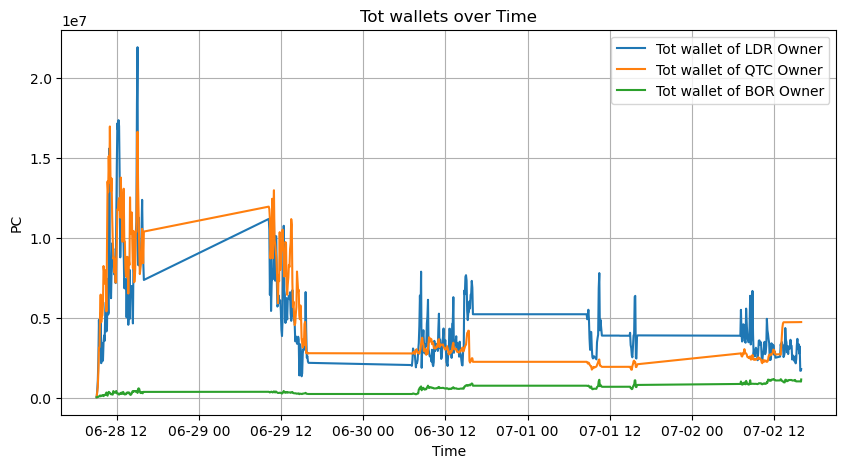

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(hist_df['Time'], hist_df['Tot wallet of LDR Owner'], label='Tot wallet of LDR Owner')
plt.plot(hist_df['Time'], hist_df['Tot wallet of QTC Owner'], label='Tot wallet of QTC Owner')
plt.plot(hist_df['Time'], hist_df['Tot wallet of BOR Owner'], label='Tot wallet of BOR Owner')
plt.xlabel('Time')
plt.ylabel('PC')
plt.title('Tot wallets over Time')
plt.grid(True)
plt.legend()

plt.savefig('Graphs/TotWallets.png', dpi=300, bbox_inches='tight')
plt.show()

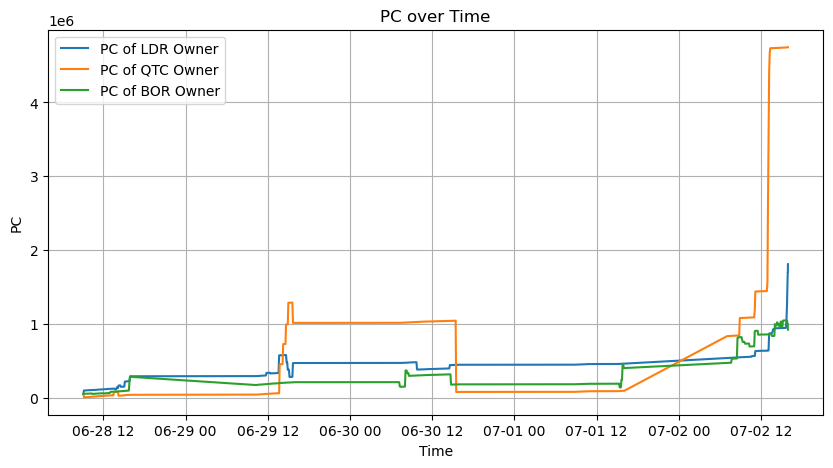

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(hist_df['Time'], hist_df['PC of LDR Owner'], label='PC of LDR Owner')
plt.plot(hist_df['Time'], hist_df['PC of QTC Owner'], label='PC of QTC Owner')
plt.plot(hist_df['Time'], hist_df['PC of BOR Owner'], label='PC of BOR Owner')
plt.xlabel('Time')
plt.ylabel('PC')
plt.title('PC over Time')
plt.grid(True)
plt.legend()

plt.savefig('Graphs/PC.png', dpi=300, bbox_inches='tight')
plt.show()

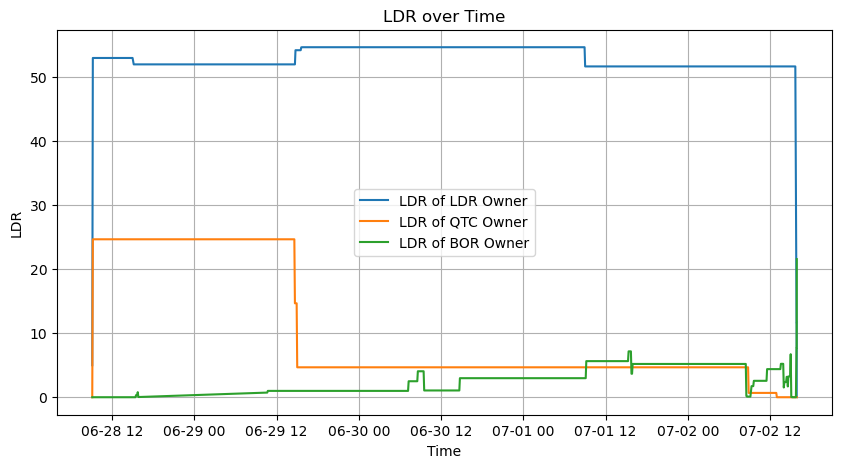

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(hist_df['Time'], hist_df['LDR of LDR Owner'], label='LDR of LDR Owner')
plt.plot(hist_df['Time'], hist_df['LDR of QTC Owner'], label='LDR of QTC Owner')
plt.plot(hist_df['Time'], hist_df['LDR of BOR Owner'], label='LDR of BOR Owner')
plt.xlabel('Time')
plt.ylabel('LDR')
plt.title('LDR over Time')
plt.grid(True)
plt.legend()

plt.savefig('Graphs/LDR.png', dpi=300, bbox_inches='tight')
plt.show()

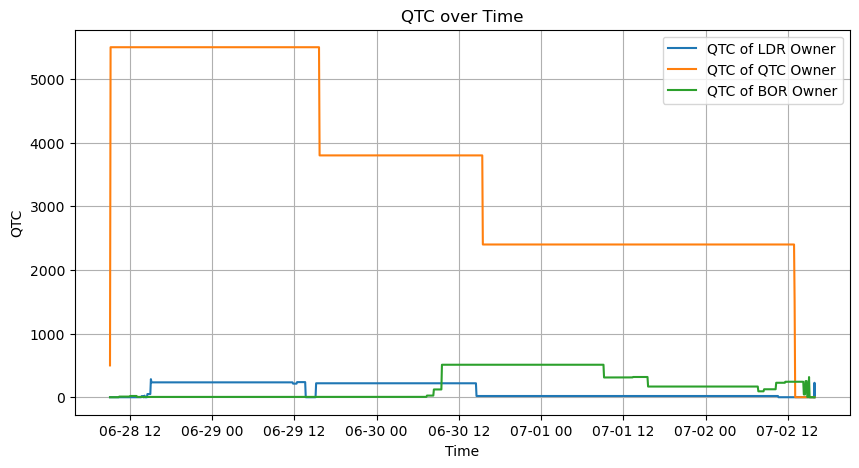

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(hist_df['Time'], hist_df['QTC of LDR Owner'], label='QTC of LDR Owner')
plt.plot(hist_df['Time'], hist_df['QTC of QTC Owner'], label='QTC of QTC Owner')
plt.plot(hist_df['Time'], hist_df['QTC of BOR Owner'], label='QTC of BOR Owner')
plt.xlabel('Time')
plt.ylabel('QTC')
plt.title('QTC over Time')
plt.grid(True)
plt.legend()

plt.savefig('Graphs/QTC.png', dpi=300, bbox_inches='tight')
plt.show()

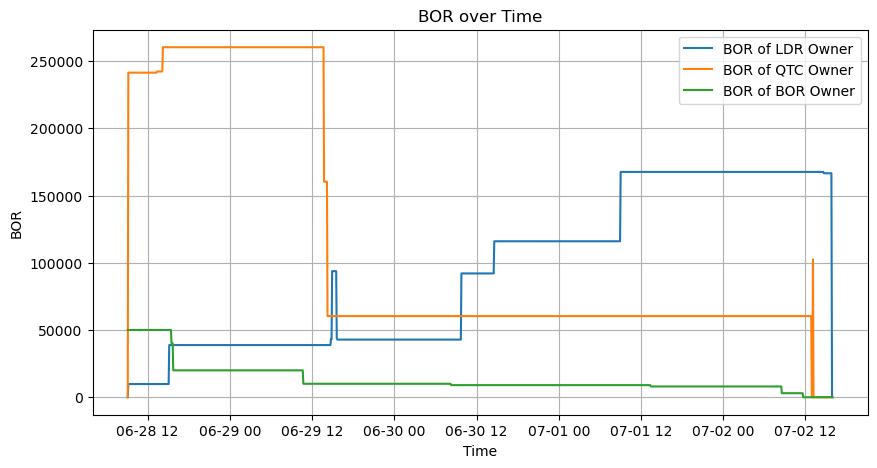

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(hist_df['Time'], hist_df['BOR of LDR Owner'], label='BOR of LDR Owner')
plt.plot(hist_df['Time'], hist_df['BOR of QTC Owner'], label='BOR of QTC Owner')
plt.plot(hist_df['Time'], hist_df['BOR of BOR Owner'], label='BOR of BOR Owner')
plt.xlabel('Time')
plt.ylabel('BOR')
plt.title('BOR over Time')
plt.grid(True)
plt.legend()

plt.savefig('Graphs/BOR.png', dpi=300, bbox_inches='tight')
plt.show()

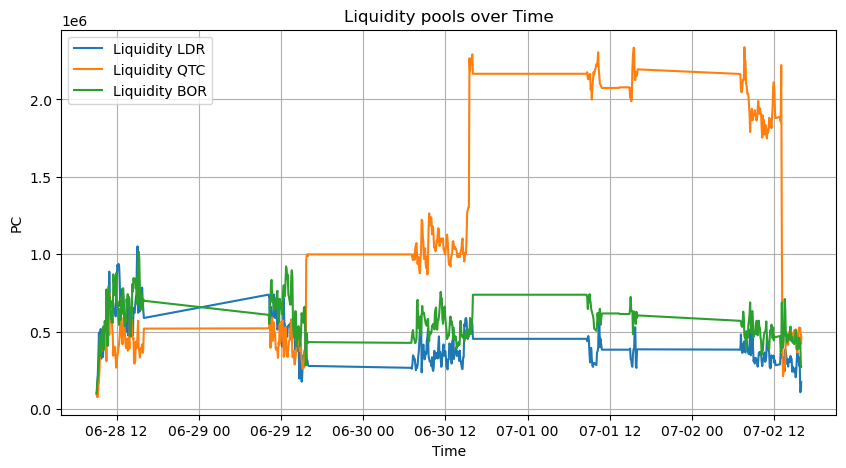

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(hist_df['Time'], hist_df['Liquidity LDR'], label='Liquidity LDR')
plt.plot(hist_df['Time'], hist_df['Liquidity QTC'], label='Liquidity QTC')
plt.plot(hist_df['Time'], hist_df['Liquidity BOR'], label='Liquidity BOR')
plt.xlabel('Time')
plt.ylabel('PC')
plt.title('Liquidity pools over Time')
plt.grid(True)
plt.legend()

plt.savefig('Graphs/LiqPools.png', dpi=300, bbox_inches='tight')
plt.show()

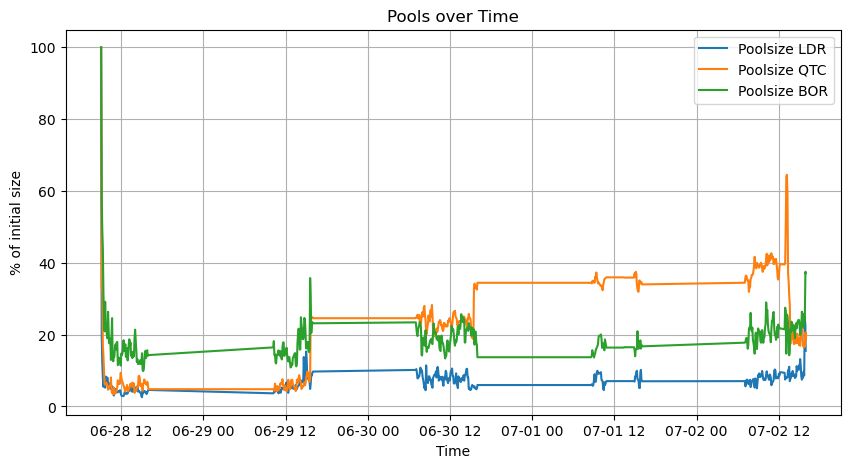

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(hist_df['Time'], hist_df['Poolsize LDR'], label='Poolsize LDR')
plt.plot(hist_df['Time'], hist_df['Poolsize QTC']/100, label='Poolsize QTC')
plt.plot(hist_df['Time'], hist_df['Poolsize BOR']/10000, label='Poolsize BOR')
plt.xlabel('Time')
plt.ylabel('%' + ' of initial size')
plt.title('Pools over Time')
plt.grid(True)
plt.legend()

plt.savefig('Graphs/Pools.png', dpi=300, bbox_inches='tight')
plt.show()

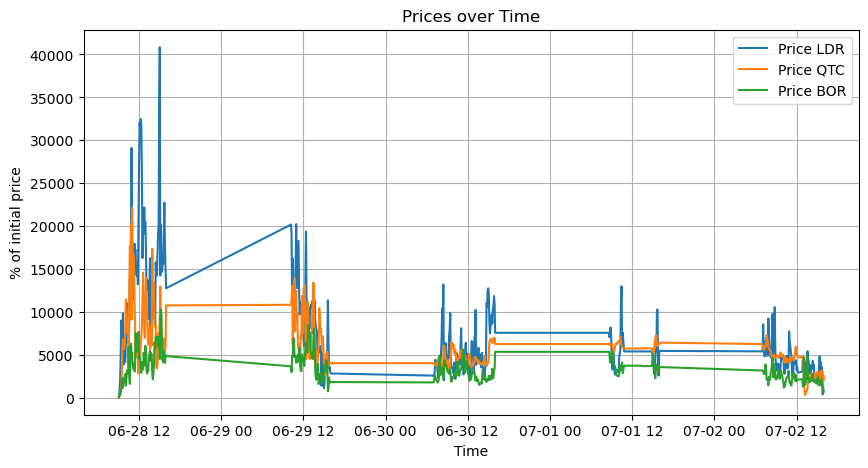

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(hist_df['Time'], hist_df['Price LDR']/10, label='Price LDR')
plt.plot(hist_df['Time'], hist_df['Price QTC']/0.1, label='Price QTC')
plt.plot(hist_df['Time'], hist_df['Price BOR']/0.001, label='Price BOR')
plt.xlabel('Time')
plt.ylabel('%' + ' of initial price')
plt.title('Prices over Time')
plt.grid(True)
plt.legend()

plt.savefig('Graphs/Prices.png', dpi=300, bbox_inches='tight')
plt.show()

### Earnings

In [14]:
chal_df = pd.read_csv('DATA/challenge_hist.csv', index_col=False,  names=['Type', 'Challenger', 'Challenged', 'Winner'])
chal_earn = {'LDR': 0, 'QTC': 0, 'BOR': 0}

for _, row in chal_df.iterrows():
            if(row['Type'] == '1v2'):
                    chal_earn[row['Challenger']] += 2000
                    chal_earn[row['Winner']] += 50000
            if(row['Type'] == '1v1'):
                    chal_earn[row['Challenger']] += 1000
                    chal_earn[row['Winner']] += 10000

In [15]:
mint_df = chal_df = pd.read_csv('DATA/Events/events_day_mint.csv', dtype={'tokenAmount':float})
mint_df.insert( loc=1, column='token', value=mint_df['tokenAddress'].map(addr_to_name))
mint_df.drop(columns=['tokenAddress'], inplace=True)
mint_df['tokenAmount'] = mint_df['tokenAmount']/10**18

mint_earn = {'LDR Owner': mint_df[mint_df['token'] == 'LDR']['tokenAmount'].sum(),
             'QTC Owner': mint_df[mint_df['token'] == 'QTC']['tokenAmount'].sum(),
             'BOR Owner': mint_df[mint_df['token'] == 'BOR']['tokenAmount'].sum()}
mint_earn

{'LDR Owner': 478207.0261468494,
 'QTC Owner': 1880160.4946446118,
 'BOR Owner': 289552.8806181536}

In [16]:
trad_earn = {'LDR Owner': fees_df['LDR Owner'].sum(),
            'QTC Owner': fees_df['QTC Owner'].sum(),
            'BOR Owner': fees_df['LDR Owner'].sum()}

In [17]:
earn_data = {
    'User': ['LDR Owner', 'QTC Owner', 'BOR Owner'],
    'Fees': [fees_df['LDR Owner'].sum(), fees_df['QTC Owner'].sum(), fees_df['BOR Owner'].sum()],
    'Challenges': [chal_earn['LDR'], chal_earn['QTC'], chal_earn['BOR']],
    'Day Mint': [mint_earn['LDR Owner'], mint_earn['QTC Owner'], mint_earn['BOR Owner']],
    'Trading': [hist_df.iloc[-1]['PC of LDR Owner'], hist_df.iloc[-1]['PC of QTC Owner'], hist_df.iloc[-1]['PC of BOR Owner']]
}

earn_df = pd.DataFrame(earn_data)

earn_df['Trading'] = earn_df['Trading'] - earn_df['Fees'] - earn_df['Challenges'] - earn_df['Day Mint'] - 50000

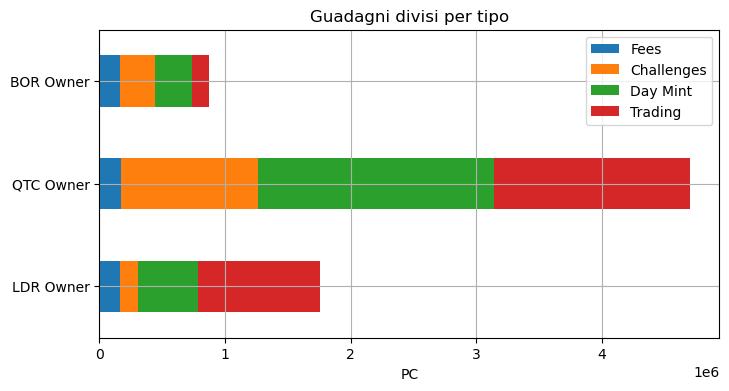

In [18]:
sources = ['Fees', 'Challenges', 'Day Mint', 'Trading']
earn_df.plot(kind='barh', x='User', y = sources, grid = True,  figsize=(8, 4), stacked=True,
                 title='Guadagni divisi per tipo')
plt.legend()
plt.xlabel('PC')
plt.ylabel('')

plt.savefig('Graphs/Earnings.png', dpi=300, bbox_inches='tight')
plt.show()